In [1]:
import matplotlib.pyplot as plt
import numpy as np
import texpy as mz
from src import *

In [143]:
def R_NLk0(k,width,lv=1e-6,tan=0.9):
    c1= 1/(1+(Lv(width,lv,tan)*k)**2)/(1+tan**(-2))
    c2= 2*np.tanh(k*width/2)/(k*width*(1+tan**2))
    return c1+c2

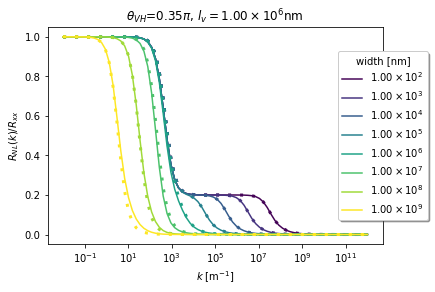

In [162]:
number_of_graphs=8
cmap=plt.get_cmap('viridis')
colors=cmap(np.linspace(1e-2,1,number_of_graphs))

widths=np.logspace(-7,-0,number_of_graphs,base=10)
#mu=np.linspace(delta,2*delta,number_of_graphs)

lv=1e-3
#tan=np.tan(np.pi/2-np.pi/30)
tan=2
theta=np.arctan(tan)
for i in range(number_of_graphs):
    k= np.logspace(-2,12,80,base=10,dtype=np.double)
    R=[R_NLk(k,widths[i],lv,tan=tan) for k in k]
    plt.plot(k,R,color=colors[i],label=str(mz.ns(widths[i]*1e9)))
    plt.plot(k,R_NLk0(k,widths[i],lv,tan=tan),linestyle=(0,(1,3)),linewidth=3,color=colors[i])



title_theta='$\\theta_{VH}$='+str(theta/np.pi)[:4]+'$\pi$'
title_lv='$l_v=$'+ str(mz.ns(lv*1e9))+'nm'

title=title_theta + ', ' + title_lv



#plt.yscale('log')
#plt.ylim(1e-1,1.2)
plt.xscale('log')
plt.xlabel('$k$ [m$^{-1}$]')
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.title(title)
plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.xlim(0,500)

In [163]:
def R_NLa(x,width,lv,tan):
    L=Lv(width,lv,tan)
    c1=np.exp(-np.abs(x)/L)/(2*L*(1+tan**(-2)))*width

    return c1+R_NL0(x,width,lv,tan)

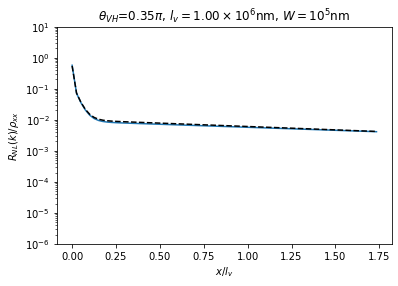

In [164]:
#x=np.array([(1/2+2**x)*np.pi for x in range(10)])
width=widths[3]
limit=1e4/width

x=(np.arange(70)*800+1/2)*np.pi/limit

args=(width,lv,tan)
Y=R_NLx(x,args,limit=limit)[:,0]*width
plt.plot(x/lv,Y)
    

yappr=R_NLa(x,*args)/2 #MA STO /2 NON DI DOVREBBE STARE...
plt.plot(x/lv,yappr,color='black',linestyle='--')

#plt.plot(x/lv,np.abs(Y*width-yappr),color='gray',linestyle='--')


plt.yscale('log')
plt.xlabel('$x/l_v$')
plt.ylabel('$R_{NL}(k)/\\rho_{xx}$')

title_width='$W=10^5$nm'
title=title_theta + ', ' + title_lv + ', ' + title_width

plt.title(title)
#plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.xlim(0,1)
plt.ylim(1e-6,1e1)
plt.savefig('R_NLx.png')

In [158]:
lv,Lv(*args)

(0.001, 0.0006333771476177012)

In [147]:
print(Y[-1]/yappr[-1])

0.49068417395482977
